In [ ]:
# Load necessary libraries
library(dplyr)
library(ggplot2)
library(readr)

In [ ]:
# Import the data
data <- read_csv('/content/Social Media Usage India.csv')
head(data)
colnames(data)

Rows: 1628 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): City, Current Status, Do you own multiple profiles on Instagram?, ...
dbl  (3): Age, Latitude, Longitude
num (14): How many followers do you have on Instagram? (In case of multiple ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,City,Current Status,Do you own multiple profiles on Instagram?,Gender,Highest Education,Location (City Airport Code),Phone OS,State,Zone,⋯,Time Spent on Instagram in last week (in minutes),Time Spent on Instagram in last weekend (in minutes),Time Spent on WhatsApp in last week (in minutes),Time Spent on WhatsApp in last weekend (in minutes),Total Facebook Usage,Total Instagram Usage,Total Social Media Usage,Total Week Usage,Total Weekend Usage,Total WhatsApp Usage
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
24,Delhi,Working professional,No,Female,Graduation,DEL,iOs,Delhi,Northern,⋯,770,400,900,120,0,1170,2190,1670,520,1020
39,Delhi,Working professional,No,Female,Post graduation,DEL,iOs,Delhi,Northern,⋯,0,0,5000,2000,8160,0,15160,11000,4160,7000
22,Mumbai,Working professional,No,Male,Graduation,BOM,Android,Maharashtra,Western,⋯,1000,1000,7000,2000,2500,2000,13500,8500,5000,9000
26,Bengaluru,Sabbatical,Yes,Female,Graduation,BLR,Android,Karnataka,Southern,⋯,2000,2000,1680,1680,3000,4000,10360,5180,5180,3360
50,Delhi,Working professional,No,Male,Graduation,DEL,iOs,Delhi,Northern,⋯,0,0,2400,1300,3000,0,6700,3900,2800,3700
25,Vishakhapatnam,Working professional,Yes,Female,Post graduation,VTZ,Android,Andhra Pradesh,Southern,⋯,3000,840,2100,600,2200,3840,8740,6100,2640,2700


[1] "Age"                                                                                                                 
 [2] "City"                                                                                                                
 [3] "Current Status"                                                                                                      
 [4] "Do you own multiple profiles on Instagram?"                                                                          
 [5] "Gender"                                                                                                              
 [6] "Highest Education"                                                                                                   
 [7] "Location (City Airport Code)"                                                                                        
 [8] "Phone OS"                                                                                                            
 [9] "State"                                                                                                               
[10] "Zone"                                                                                                                
[11] "How many followers do you have on Instagram? (In case of multiple accounts, please mention the one with the maximum)"
[12] "How many posts do you have on Instagram?"                                                                            
[13] "Latitude"                                                                                                            
[14] "Longitude"                                                                                                           
[15] "Time Spent on Facebook in last week (in minutes)"                                                                    
[16] "Time Spent on Facebook in last weekend (in minutes)"                                                                 
[17] "Time Spent on Instagram in last week (in minutes)"                                                                   
[18] "Time Spent on Instagram in last weekend (in minutes)"                                                                
[19] "Time Spent on WhatsApp in last week (in minutes)"                                                                    
[20] "Time Spent on WhatsApp in last weekend (in minutes)"                                                                 
[21] "Total Facebook Usage"                                                                                                
[22] "Total Instagram Usage"                                                                                               
[23] "Total Social Media Usage"                                                                                            
[24] "Total Week Usage"                                                                                                    
[25] "Total Weekend Usage"                                                                                                 
[26] "Total WhatsApp Usage"

In [ ]:
# Rename columns
data <- data %>% rename(
  `Instagram Followers` = `How many followers do you have on Instagram? (In case of multiple accounts, please mention the one with the maximum)`,
  `Instagram Posts` = `How many posts do you have on Instagram?`
)
colnames(data)

[1] "Age"                                                 
 [2] "City"                                                
 [3] "Current Status"                                      
 [4] "Do you own multiple profiles on Instagram?"          
 [5] "Gender"                                              
 [6] "Highest Education"                                   
 [7] "Location (City Airport Code)"                        
 [8] "Phone OS"                                            
 [9] "State"                                               
[10] "Zone"                                                
[11] "Instagram Followers"                                 
[12] "Instagram Posts"                                     
[13] "Latitude"                                            
[14] "Longitude"                                           
[15] "Time Spent on Facebook in last week (in minutes)"    
[16] "Time Spent on Facebook in last weekend (in minutes)" 
[17] "Time Spent on Instagram in last week (in minutes)"   
[18] "Time Spent on Instagram in last weekend (in minutes)"
[19] "Time Spent on WhatsApp in last week (in minutes)"    
[20] "Time Spent on WhatsApp in last weekend (in minutes)" 
[21] "Total Facebook Usage"                                
[22] "Total Instagram Usage"                               
[23] "Total Social Media Usage"                            
[24] "Total Week Usage"                                    
[25] "Total Weekend Usage"                                 
[26] "Total WhatsApp Usage"

In [ ]:
# Primary Analysis
str(data)
dim(data)

spc_tbl_ [1,628 × 26] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Age                                                 : num [1:1628] 24 39 22 26 50 25 52 45 25 27 ...
 $ City                                                : chr [1:1628] "Delhi" "Delhi" "Mumbai" "Bengaluru" ...
 $ Current Status                                      : chr [1:1628] "Working professional" "Working professional" "Working professional" "Sabbatical" ...
 $ Do you own multiple profiles on Instagram?          : chr [1:1628] "No" "No" "No" "Yes" ...
 $ Gender                                              : chr [1:1628] "Female" "Female" "Male" "Female" ...
 $ Highest Education                                   : chr [1:1628] "Graduation" "Post graduation" "Graduation" "Graduation" ...
 $ Location (City Airport Code)                        : chr [1:1628] "DEL" "DEL" "BOM" "BLR" ...
 $ Phone OS                                            : chr [1:1628] "iOs" "iOs" "Android" "Android" ...
 $ State                     

[1] 1628   26

In [ ]:
# Sample Row
data[1, ]

Age,City,Current Status,Do you own multiple profiles on Instagram?,Gender,Highest Education,Location (City Airport Code),Phone OS,State,Zone,⋯,Time Spent on Instagram in last week (in minutes),Time Spent on Instagram in last weekend (in minutes),Time Spent on WhatsApp in last week (in minutes),Time Spent on WhatsApp in last weekend (in minutes),Total Facebook Usage,Total Instagram Usage,Total Social Media Usage,Total Week Usage,Total Weekend Usage,Total WhatsApp Usage
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
24,Delhi,Working professional,No,Female,Graduation,DEL,iOs,Delhi,Northern,⋯,770,400,900,120,0,1170,2190,1670,520,1020


In [ ]:
# Value counts for 'Current Status'
table(data$`Current Status`)

# Function to convert object to numeric
convert_to_num <- function(x) {
  as.numeric(gsub(",", "", x))
}


          Sabbatical        Self Employed              Student 
                 190                    5                  637 
Working professional 
                 796 

In [ ]:
# Filter data for Working professionals
data_c <- filter(data, `Current Status` == "Working professional")
data_c <- data_c %>%
  mutate(
    `Total Week Usage` = sapply(`Total Week Usage`, convert_to_num),
    `Total Weekend Usage` = sapply(`Total Weekend Usage`, convert_to_num)
  )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


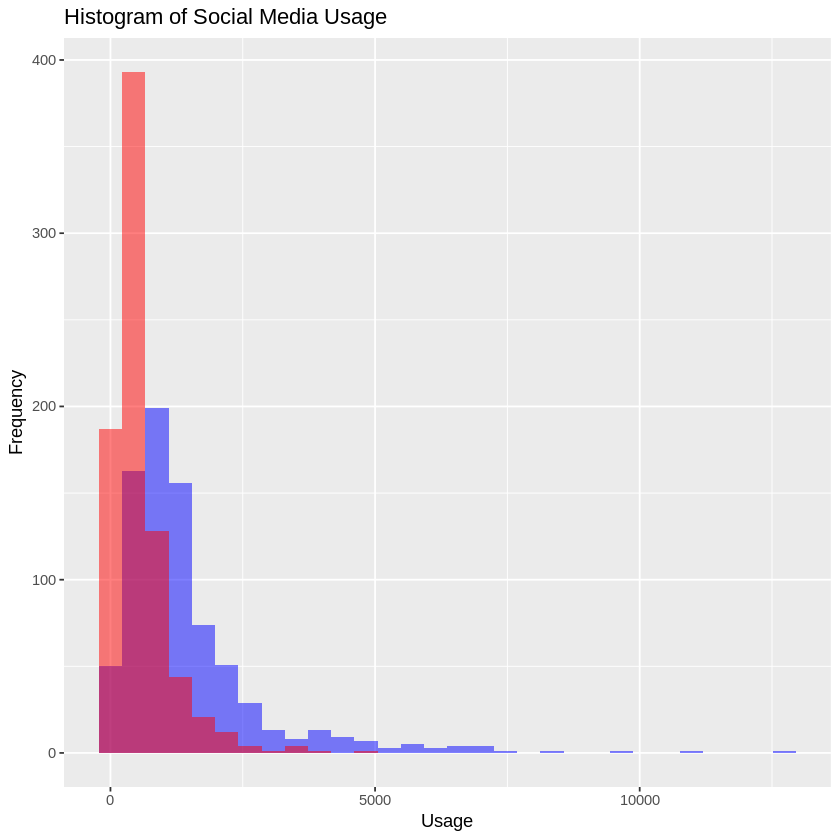

In [ ]:
# Histogram for Weekend vs Weekly Usage
ggplot() +
  geom_histogram(data = data_c, aes(x = `Total Week Usage`), fill = "blue", alpha = 0.5) +
  geom_histogram(data = data_c, aes(x = `Total Weekend Usage`), fill = "red", alpha = 0.5) +
  labs(title = "Histogram of Social Media Usage", x = "Usage", y = "Frequency") +
  scale_fill_manual(name = "Usage Type", values = c("blue" = "Total Week Usage", "red" = "Total Weekend Usage"))


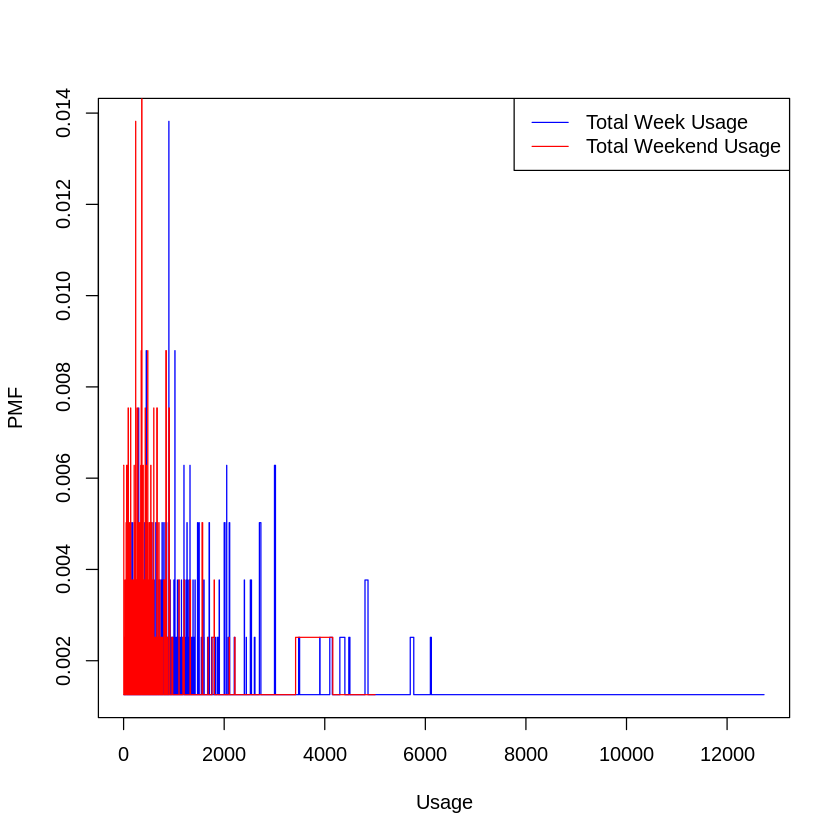

In [ ]:
# Probability Mass Function (PMF) function
pmf <- function(seq) {
  freq_table <- table(seq)
  pmf_dict <- as.list(freq_table / length(seq))
  pmf_dict
}

pmf_week_usage <- pmf(data_c$`Total Week Usage`)
pmf_weekend_usage <- pmf(data_c$`Total Weekend Usage`)

# PMF plot
plot(sort(unique(data_c$`Total Week Usage`)), unlist(pmf_week_usage), type = "s", col = "blue", xlab = "Usage", ylab = "PMF")
lines(sort(unique(data_c$`Total Weekend Usage`)), unlist(pmf_weekend_usage), type = "s", col = "red")
legend("topright", legend = c("Total Week Usage", "Total Weekend Usage"), col = c("blue", "red"), lty = 1)


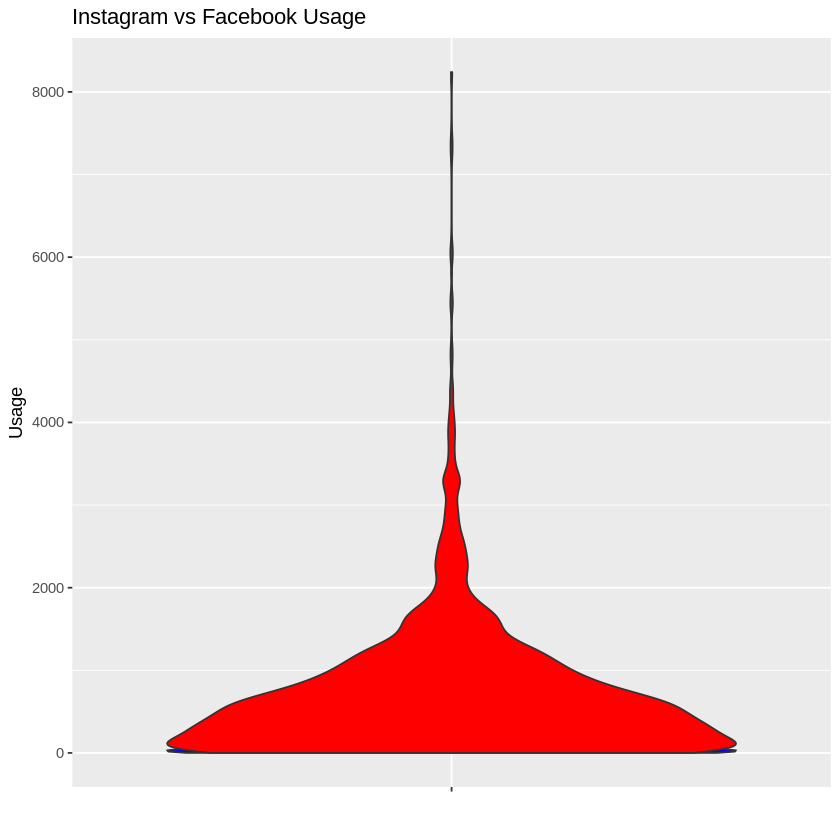

In [ ]:
# Filter Instagram and Facebook usage data
data_c <- data %>%
  select(`Total Facebook Usage`, `Total Instagram Usage`, `Total Social Media Usage`) %>%
  mutate(across(everything(), convert_to_num))

# Violin Plot
ggplot(data_c) +
  geom_violin(aes(x = "", y = `Total Facebook Usage`), fill = "blue") +
  geom_violin(aes(x = "", y = `Total Instagram Usage`), fill = "red") +
  labs(title = "Instagram vs Facebook Usage", x = "", y = "Usage")

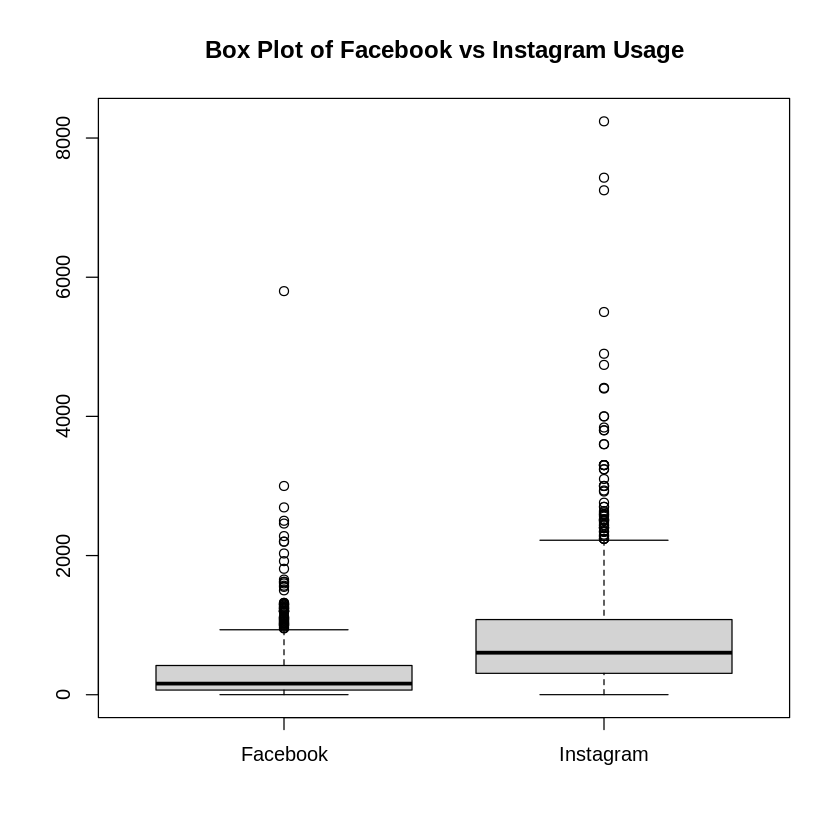

In [ ]:
# Filter out rows with zero usage
data_c <- filter(data_c, `Total Facebook Usage` > 0 & `Total Instagram Usage` > 0)

# Box Plot
boxplot(data_c$`Total Facebook Usage`, data_c$`Total Instagram Usage`, names = c("Facebook", "Instagram"), main = "Box Plot of Facebook vs Instagram Usage")


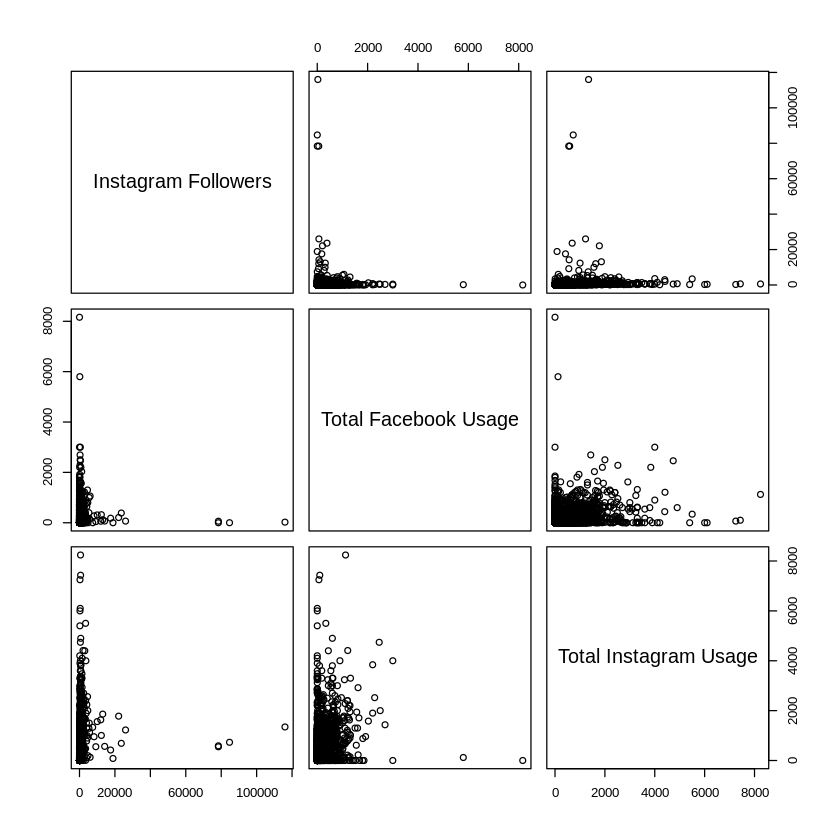

In [ ]:
# Scatter plot for Instagram Followers and Social Media Usage
data_c <- data %>%
  select(Age, City, `Current Status`, `Do you own multiple profiles on Instagram?`, Gender, `Highest Education`, `Location (City Airport Code)`, `Phone OS`, State, Zone, `Instagram Followers`, `Total Facebook Usage`, `Total Instagram Usage`, `Total Social Media Usage`) %>%
  mutate(
    `Total Facebook Usage` = sapply(`Total Facebook Usage`, convert_to_num),
    `Total Instagram Usage` = sapply(`Total Instagram Usage`, convert_to_num),
    `Instagram Followers` = sapply(`Instagram Followers`, convert_to_num),
    `Total Social Media Usage` = sapply(`Total Social Media Usage`, convert_to_num)
  )

pairs(data_c[, c("Instagram Followers", "Total Facebook Usage", "Total Instagram Usage")])


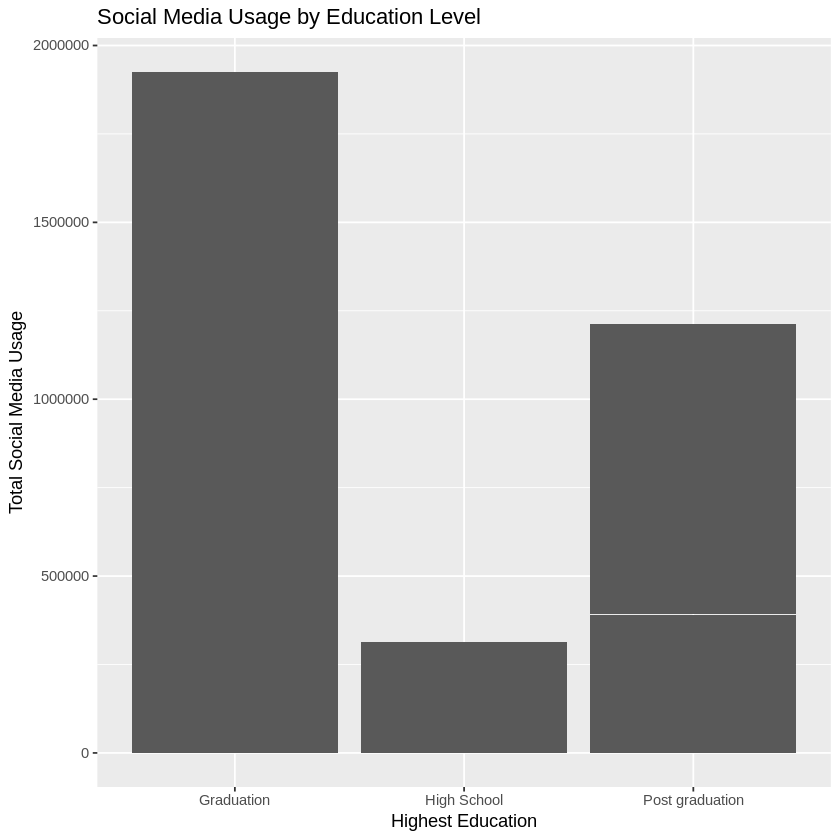

In [ ]:
# Bar chart of Highest Education vs Total Social Media Usage
ggplot(data_c, aes(x = `Highest Education`, y = `Total Social Media Usage`)) +
  geom_bar(stat = "identity") +
  labs(title = "Social Media Usage by Education Level")


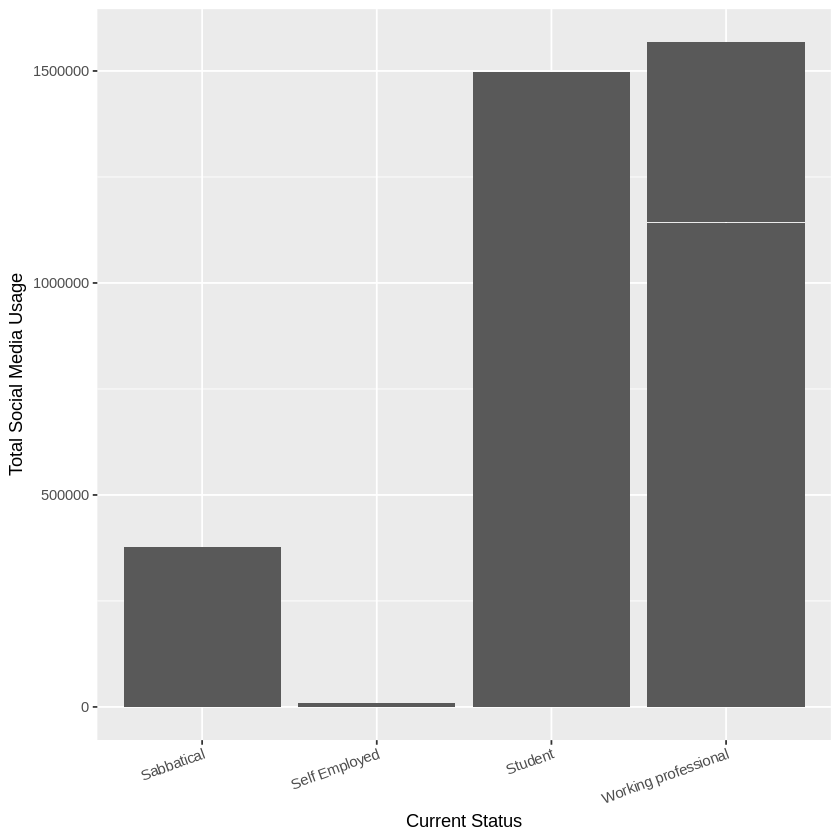

In [ ]:
# Current Status vs Social Media Usage
ggplot(data_c, aes(x = `Current Status`, y = `Total Social Media Usage`)) +
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 20, hjust = 1))


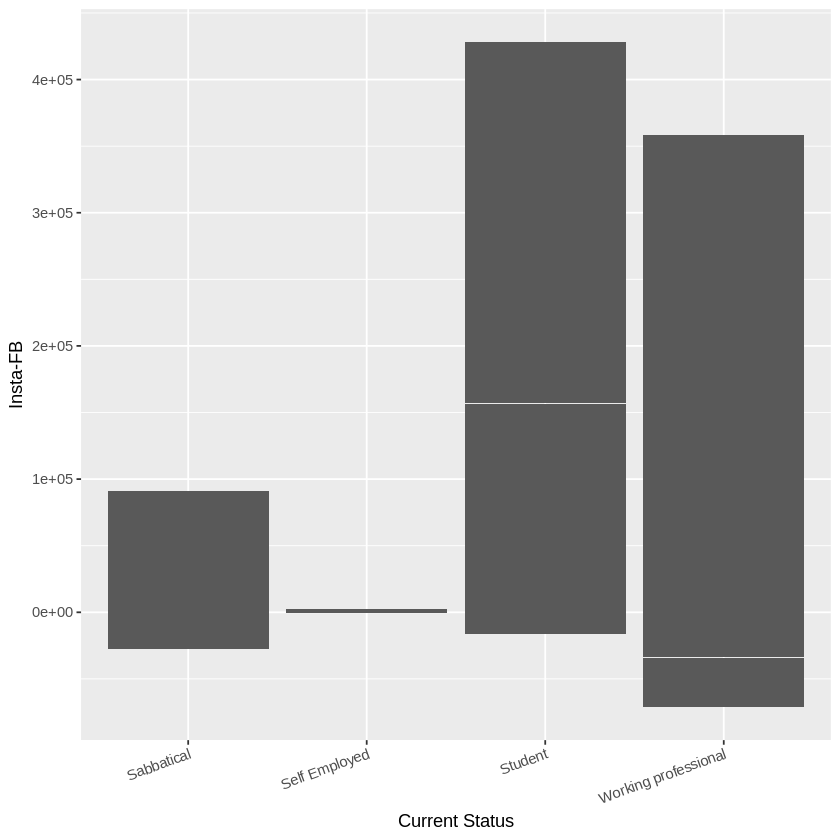

In [ ]:
# Calculate Instagram - Facebook difference and plot
data_c <- data_c %>%
  mutate(`Insta-FB` = `Total Instagram Usage` - `Total Facebook Usage`)

ggplot(data_c, aes(x = `Current Status`, y = `Insta-FB`)) +
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 20, hjust = 1))


In [ ]:
# Define metro city dictionary and map it to data
metro_city_dict <- c(
  'Agra' = 0, 'Ahmedabad' = 1, 'Allahabad' = 0, 'Amritsar' = 0, 'Aurangabad' = 0,
  'Bagdogra' = 0, 'Baroda' = 0, 'Belgaum' = 0, 'Bengaluru' = 1, 'Bhavnagar' = 0,
  'Bhopal' = 0, 'Bhubaneshwar' = 0, 'Bhuj' = 0, 'Chandigarh' = 0, 'Chennai' = 1,
  'Coimbatore' = 0, 'Cooch-behar' = 0, 'DehraDun' = 0, 'Delhi' = 1, 'Dibrugarh' = 0,
  'Durgapur' = 0, 'Goa' = 0, 'Guwahati' = 0, 'Gwalior' = 0, 'Hyderabad' = 1,
  'Indore' = 0, 'Jaipur' = 1, 'Jammu' = 0, 'Jorhat' = 0, 'Kandla' = 0, 'Kanpur' = 1,
  'Kochi' = 0, 'Kolkata' = 1, 'Kulu' = 0, 'Lucknow' = 0, 'Ludhiana' = 0, 'Madurai' = 1,
  'Mangalore' = 0, 'Mumbai' = 1, 'Nagpur' = 1, 'Nainital' = 0, 'Pathankot' = 0,
  'Patna' = 1, 'Pune' = 1, 'Raipur' = 0, 'Rajkot' = 0, 'Ranchi' = 0, 'Surat' = 1,
  'Thiruvananthapuram' = 0, 'Tiruchirappalli' = 0, 'Udaipur' = 0, 'Varanasi' = 0,
  'Vishakhapatnam' = 1
)
data_c$Metropolitan <- data$City %>% recode(!!!metro_city_dict)

# Followers by City
followersByCity <- data_c %>%
  group_by(City) %>%
  summarize(`Instagram Followers` = mean(`Instagram Followers`, na.rm = TRUE))

# Analyze followers by city and standard deviation
followersByCity <- followersByCity %>%
  mutate(Metropolitan = recode(City, !!!metro_city_dict))

followersByCity %>%
  group_by(Metropolitan) %>%
  summarize(mean_followers = mean(`Instagram Followers`), sd_followers = sd(`Instagram Followers`))


Metropolitan,mean_followers,sd_followers
<dbl>,<dbl>,<dbl>
0,847.2485,1989.0968
1,804.7041,853.4618


In [ ]:
install.packages("shiny")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**How does social media usage vary among different age groups, and what does this imply about cultural shifts in communication preferences?**
Analyzing the total social media usage across age groups can highlight how younger versus older generations engage differently on platforms like Instagram and Facebook, offering insights into generational cultural trends.

**Is there a correlation between education level and social media engagement, and how might this affect cultural perspectives and information consumption?**
By comparing education levels with total social media usage, you can explore whether people with higher education are more or less engaged on social media, possibly reflecting on how informed or culturally diverse perspectives are shared.

**How does social media usage differ between working professionals and students, and what cultural implications might these patterns suggest?**
Analyzing social media activity across user status (e.g., working professionals vs. students) could reveal how work-life balance or career priorities influence cultural engagement with online platforms.

**What is the impact of follower count and engagement (e.g., posts) on social media on user behavior, and how might this affect cultural influence or identity?**
Investigating if individuals with higher follower counts or post frequency use social media differently may provide insights into how social media affects cultural identity, self-expression, or influence in Indian society.

**Are there distinct patterns in weekend vs. weekday social media usage, and what does this suggest about cultural trends in leisure and digital behavior?**
By examining differences in social media usage during weekends versus weekdays, you can explore how social media fits into daily routines and leisure activities, potentially indicating shifts in how digital life is prioritized culturally.

In [ ]:
library(shiny)
shiny::runApp("/content/app.R")



Listening on http://127.0.0.1:3104

